# Life Expectancy GDP Project 

Goals for this project:
- analyze the data from the 'all_data.csv'
- Ensure data is readable, no missing data, easily traversable 
- Determine any relationships in the data (GDP vs. Life expectency, GDP vs. time, life expectency vs. time, etc.) with readable plots

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
from matplotlib import pyplot 

Import and observe the data

In [161]:
df = pd.read_csv('all_data.csv')
print(df.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


In [4]:
df.rename(columns = {'Life expectancy at birth (years)':'Life_expect'}, inplace = True)
print(df.head())

  Country  Year  Life_expect           GDP
0   Chile  2000         77.3  7.786093e+10
1   Chile  2001         77.3  7.097992e+10
2   Chile  2002         77.8  6.973681e+10
3   Chile  2003         77.9  7.564346e+10
4   Chile  2004         78.0  9.921039e+10


Let's check the data. What unique data is there? What type of data is in the csv file?

In [82]:
print(df.info())
print('\n')
print('Number of unique data in the csv is: ')
print(df.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      96 non-null     object 
 1   Year         96 non-null     int64  
 2   Life_expect  96 non-null     float64
 3   GDP          96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.7+ KB
None


Number of unique data in the csv is: 
Country         6
Year           16
Life_expect    69
GDP            96
dtype: int64


In [15]:
#Ensure there's no missing data
print(df.isna().any())

Country        False
Year           False
Life_expect    False
GDP            False
dtype: bool


Data looks good, there's nothing missing and everything besides the Country's name is a integer or float. 

Create graphs of data to show how life expectency changes through the years with GDP. How life expectency between the different countries looks at a particular year. 

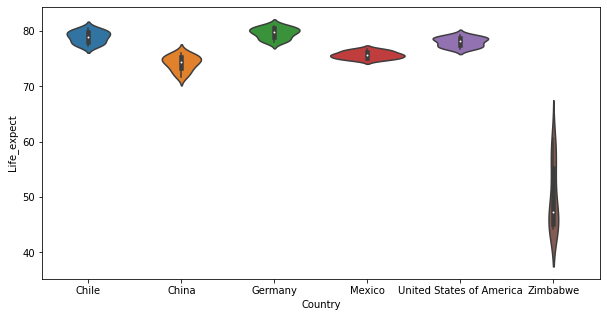

In [140]:
#Life expectency plots per country
fig = plt.subplots(figsize=(10, 5))
sns.violinplot(data=df, x='Country', y='Life_expect', fontsize='large', fontweight='bold')

From the plot we can see that Zimbabwe has the largest range for it's life expectency over 15 years. The other countries have relatively similar median life expectency ages of between 70 - 80 years. 

Text(0.5, 1.0, 'GDP per Capita')

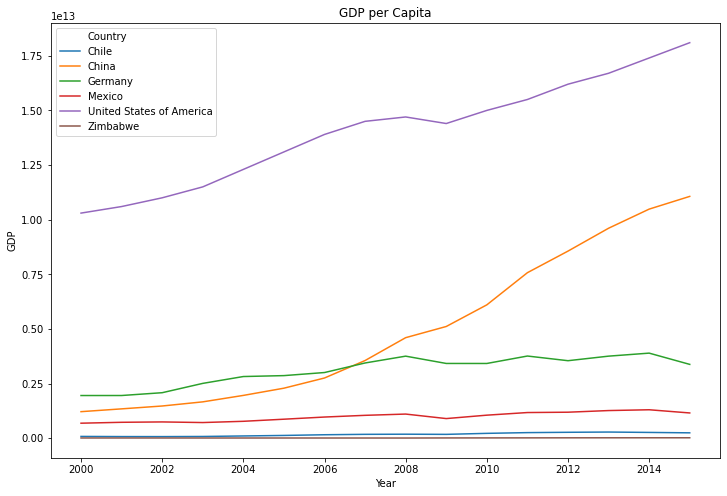

In [173]:
fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(x="Year", y="GDP", hue="Country", data=df)
plt.title('GDP per Capita')

Overall countries like China and the United States of America showed the greatest increase in GDP over 15 years. 

Text(0.5, 1.0, 'GDP per Capita')

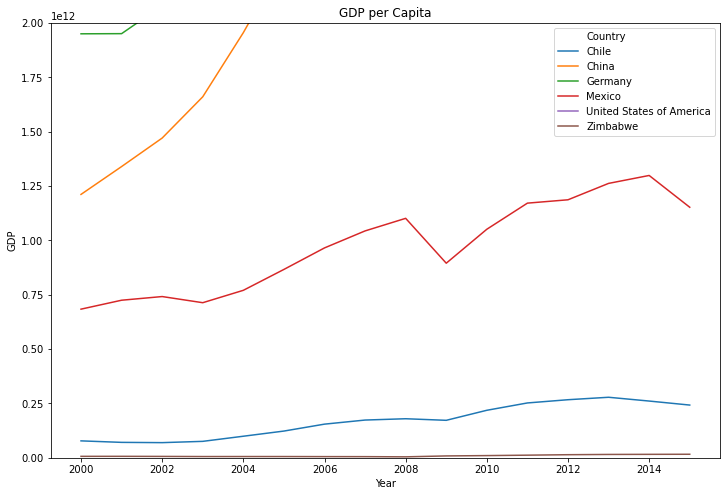

In [176]:
fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(x="Year", y="GDP", hue="Country", data=df)
plt.ylim(0, 2e12)
plt.title('GDP per Capita')

Scaling the y axis on the previous plot shows that countries lik Chile, Mexico, and Zimbabwe don't have a significantly high growth of GDP between 2000 and 2015. 

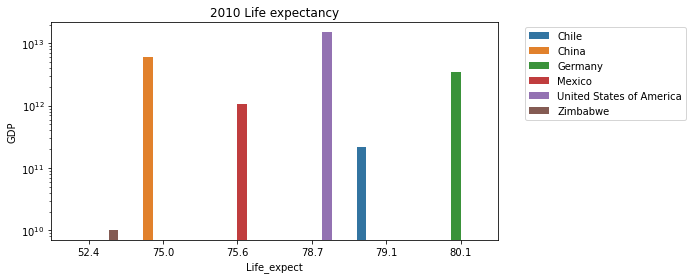

<Figure size 432x288 with 0 Axes>

In [110]:
#Life expectancy plots (2010)
fig, ax = plt.subplots(figsize=(8,4))
df_2010 = df[df.Year == 2010]
sns.barplot(data = df_2010,x = 'Life_expect', y = 'GDP', hue = 'Country' )

plt.title('2010 Life expectancy')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.yscale('log')
plt.show()
plt.clf()

In 2010, Germany had the highest life expectency, but China and the United States of America both outperformed Germany 
in terms of GDP for the year. Chile had the second highest life expectency and Zimbabwe had the lowest life expectency.

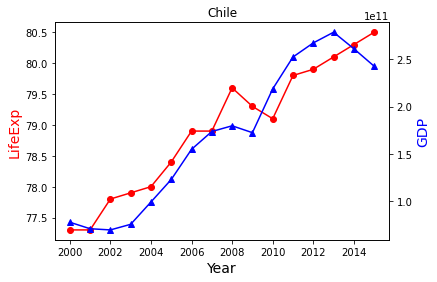

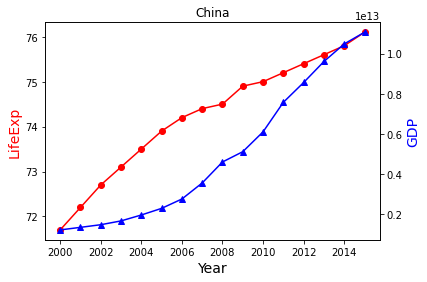

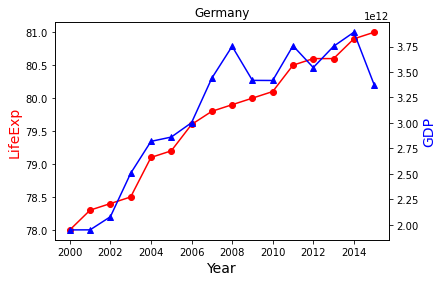

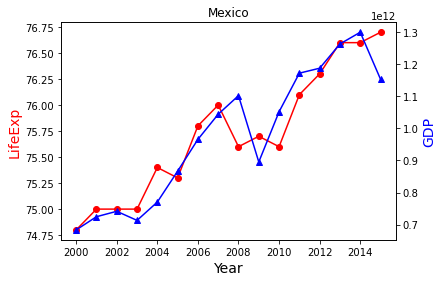

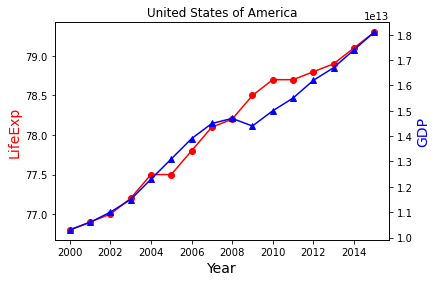

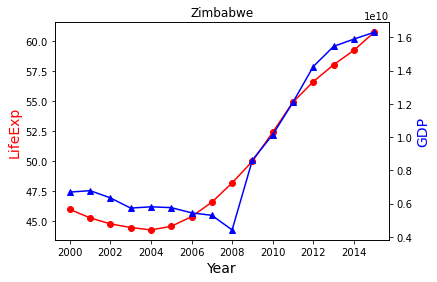

In [80]:
# create figure and axis objects with subplots()
for country in df.Country.unique():
    dfc = df[df.Country == country]
    
    fig,ax = plt.subplots()
    ax.plot(dfc.Year, dfc.Life_expect, color="red", marker="o")
    ax.set_xlabel("Year",fontsize=14)
    ax.set_ylabel("LifeExp",color="red",fontsize=14)

    ax2=ax.twinx()
    ax2.plot(dfc.Year, dfc.GDP,color="blue",marker="^")
    ax2.set_ylabel("GDP",color="blue",fontsize=14)
    plt.title(country)
    plt.show()

In general, life expectency increases over the years, as does GDP. Life expectency doesn't follow GDP every year, for 
eg. in 2008 Chile's GDP drops but the life expectency increased from 2007. Same situation happend in Zimbabwe during 2008.
In China, the life-expectency growth was increased at a sluggish rate compared to the GDP. Zimbabwe, overall, had the 
highest increase in life expectency (~15 years) between 2000 - 2014, far greater than the other countries. 

Another important thing to note is that during 2007 - 2009 there was a global recession, hence why GDP dropped for a lot of countries. 